# Определение перспективного тарифа для телеком-компании

Описание проекта
Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нужно сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

1. Изучим полученные данные
2. Проведем предобработку: Заполним пропуски, проверим на дубликаты, поменяем типы данных, совместим полученные таблицы
3. Посчитаем и добавим в таблицу. Звонки в минутах, количество отправленных смс каждым пользователем,  трафик в гб, общую выручку
4. Проведем анализ, посчитаем среднее, дисперсию и стандартное отклонение для звонков, смс и интернет трафика. Построим графики.
5. Сотавим и проверим гипозеты.
6. Общий вывод

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as plt
import math
from scipy import stats as st
pd.set_option('display.max_columns', 50) 

## Изучение данных

In [3]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs =pd.read_csv('/datasets/tariffs.csv')

Изучим каждую таблицу отдельно

In [4]:
display(users.head())
users.info()
users.isna().sum()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

In [5]:
display(calls.head())
calls.info()
calls.isna().sum()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [6]:
display(messages.head())
messages.info()
messages.isna().sum()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id              0
message_date    0
user_id         0
dtype: int64

In [7]:
display(internet.head())
internet.info()
internet.isna().sum()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [8]:
display(tariffs.head())
tariffs.info()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Данные выглядят в порядке, но нужно будет объедить все таблицы, заполнить пропуски в churn_date.

<AxesSubplot:>

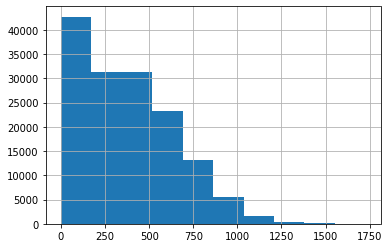

In [9]:
internet['mb_used'].hist()

На гистограме интернет трафика, пик находиться на "0", скорее всего это вызвано тем, что много пользователей не использовали интернет либо вовсе не использовали свои тарифы, но зарегистрировались, поэтому удалять такие строки не нужно.

## Подготовка данных

Перед тем, как собирать данные в таблицу переименуем повторяющиеся названия столбцов в таблицах, что соединение таблиц прошло корректно.

In [10]:
calls = calls.rename(columns ={'id' : 'calls_id'})
messages = messages.rename(columns ={'id' : 'messages_id'})
internet = internet.rename(columns ={'id' : 'internet_id'})
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs
display(calls.head())
display(messages.head())
display(internet.head())

,calls_id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,messages_id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,Unnamed: 0,internet_id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Стобце 'unnamed: 0' повторяет номер строки, соотвествественно от него можно избавиться.

In [11]:
del internet['Unnamed: 0']
display(internet.head(1))

,internet_id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000


### Замена пропусков

Будем считать, что пропуски в стобце 'churn_date' означают то, что тариф до сих пор используется.

In [12]:
users['churn_date'] = users['churn_date'].fillna('active')
users['churn_date'].isna().sum()

0

### Приводим стобцы с датой в формат datetime, добавляем стобец 'month'

Меняем форматы столбцов с датой на datetime, для того, чтобы добавить столбец 'month' с помощью, которого сможем распределить значения по месяцам.

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y.%m.%d')
display(users.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,active,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,active,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,active,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,active,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y.%m.%d')
messages['month'] = messages['message_date'].dt.month
display(messages.head())

,messages_id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [15]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y.%m.%d')
calls['month'] = calls['call_date'].dt.month
display(calls.head())

,calls_id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y.%m.%d')
internet['month'] = internet['session_date'].dt.month
display(internet.head())

,internet_id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


#### Приводим данные по звонкам и трафику к заявленому условиями оператором для расчетов

Из условий известно, что оператор взимает плату или списывает минуты, гигабайты даже если пользователь израсходовал 1 секунду или 1 мегабайт. Обсулавливается это тем, что на сл месяц сохраненные ранее минуты, смс, и трафик не переводятся, а обновляются снова с значениям выбранного тарифа. А при покупки дополнительных пакетов, цена указана за 1 гб, за 1 минуту и за 1 сбщ, поэтому приведем продолжительность звонков в минуты. Мегабайты переведем в гб позже.

In [17]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
print(calls['duration'].unique())

[ 0  3 14  6 19  8 10  5 13 16  9  2 15 11 24 12 23  7 20  1  4 17 21 18
 25 22 27 26 29 28 30 37 31 33 34 32 36 35 38]


#### Формируем сводные таблицы

1. По скольку у нас есть столбец с номером каждого месяца, формируем данные в удобный для соединия таблиц вид
2. Тут же посчитаем суммарное количество на каждого пользователя за каждый месяц:
* минут
* сообщение
* трафика в мегабайтах

In [18]:
calls_df = calls.groupby(['user_id', 'month'])['duration'].sum().reset_index()
display(calls_df)

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


In [19]:
messages_df = messages.groupby(['user_id', 'month'])['messages_id'].count().reset_index()
display(messages_df)

,user_id,month,messages_id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [20]:
internet_df = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
display(internet_df)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Получив сводные таблицы, собираем их в единый датафрейм.

### Собираем датафрейм

In [21]:
df = calls_df.merge(internet_df, on =['user_id', 'month'], how = 'outer')
df = df.merge(messages_df, on=['user_id', 'month'], how='left')
df = df.merge(users, on='user_id', how='left')
df = df.merge(tariffs, on = 'tariff')
display(df)
df.isna().sum()

,user_id,month,duration,mb_used,messages_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,2253.49,22.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,23233.77,60.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,14003.64,75.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,14055.93,81.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,14568.91,57.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,11050.56,17.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3210,1489,9,NaN,17206.30,32.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3211,1489,10,NaN,19559.44,21.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11,NaN,17491.56,20.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


user_id                    0
month                      0
duration                  40
mb_used                   11
messages_id              497
age                        0
churn_date                 0
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

Появились пропуски, которые появились из-за разного количества строк.

### Редактируем датафрейм

#### Изменение названий стобцов

Приведем названия столбцов с количесвтом сообщений и продолжительностью звонков в минутах, к более подходящим названиям. 

In [22]:
df = df.rename(columns={'messages_id':'message_count', 'duration': 'call_min'})
df.head(0)

,user_id,month,call_min,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute


#### Заполняем пропуски

Пропуски можно заполнить нулями, так как эти значения появились из-за совмещения таблиц, а значит если заполнить их средним или медианным значением, мы получим данные, которых вообще никогда не существовало.

In [23]:
df['message_count'] = df['message_count'].fillna(0)
df['call_min'] = df['call_min'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df.isna().sum()

user_id                  0
month                    0
call_min                 0
mb_used                  0
message_count            0
age                      0
churn_date               0
city                     0
first_name               0
last_name                0
reg_date                 0
tariff                   0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

#### Расчитаем и добавим в таблицу столбцы с гигабайтами

Создаем столбцем с количеством гигабайтов используемых в течение каждого месяца, округляем в большую сторону исходя из условий оператора сотовой связи. В этом же блоке сразу приведем значения трафика указанном в условиях тарифных планов к гигабайтам.

In [24]:
df['gb_used'] = df['mb_used'] / 1024
df['gb_used'] = np.ceil(df['gb_used']).astype('int')
df['gb_used'].unique()

array([ 3, 23, 14, 15, 10,  9, 13, 12, 18, 22, 28, 19, 16, 21,  8,  6,  5,
        7, 11,  1, 20, 27,  4, 43, 36, 25, 24, 35, 30, 17, 26,  0,  2, 49,
       39, 29, 33, 34, 32, 38, 42, 37, 31, 40, 41, 48, 45, 44])

In [25]:
df['mb_per_month_included'] = df['mb_per_month_included'] / 1024
df = df.rename(columns={'mb_per_month_included':'gb_per_month_included'})
df.head(0)

,user_id,month,call_min,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used


#### Рассчитываем и добавляем недостающие данные

Посчитаем количество звонков

In [26]:
calls_count = calls.groupby('user_id')['calls_id'].count()
display(calls_count)

user_id
1000    368
1001    122
1002    217
1003    520
1004    176
       ... 
1495    565
1496    828
1497    201
1498    180
1499    220
Name: calls_id, Length: 492, dtype: int64

1. Посчитаем и добавим в таблицу выручку за каждый месяц с каждого абонента в соотвествии с условиями тарифного плана
2. Добавим столбец с общей выручкой по месяцам за каждого абонента

In [27]:
def price(row):
    if row['tariff'] == 'smart':
        if row['call_min'] > row['minutes_included']:
            mins = (row['call_min'] - row['minutes_included']) * 3
            return mins
        else:
            return 0
    if row['tariff'] == 'ultra':
        if row['call_min'] > row['minutes_included']:
            minute = (row['call_min'] - row['minutes_included']) * 1 
            return minute
        else:
            return 0
df['price_min'] = df.apply(price, axis=1)
def price_mes(row):
    if row['tariff'] == 'smart':
        if row['message_count'] > row['messages_included']:
            mins = (row['message_count'] - row['messages_included']) * 3
            return mins
        else:
            return 0
    if row['tariff'] == 'ultra':
        if row['message_count'] > row['messages_included']:
            minute = (row['message_count'] - row['messages_included']) * 1 
            return minute
        else:
            return 0
df['price_message'] = df.apply(price_mes, axis=1)
def price_internet(row):
    if row['tariff'] == 'smart':
        if row['gb_used'] > row['gb_per_month_included']:
            mins = (row['gb_used'] - row['gb_per_month_included']) * 200
            return mins
        else:
            return 0
    if row['tariff'] == 'ultra':
        if row['gb_used'] > row['gb_per_month_included']:
            minute = (row['gb_used'] - row['gb_per_month_included']) * 150
            return minute
        else:
            return 0
df['price_internet'] = df.apply(price_internet, axis=1) 
df['full_price'] = df['rub_monthly_fee'] + df['price_internet'] + df['price_message'] + df['price_min']
display(df)

,user_id,month,call_min,mb_used,message_count,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_used,price_min,price_message,price_internet,full_price
0,1000,5,159.0,2253.49,22.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,3,0.0,0.0,0.0,1950.0
1,1000,6,172.0,23233.77,60.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,23,0.0,0.0,0.0,1950.0
2,1000,7,340.0,14003.64,75.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,14,0.0,0.0,0.0,1950.0
3,1000,8,408.0,14055.93,81.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,14,0.0,0.0,0.0,1950.0
4,1000,9,466.0,14568.91,57.0,52,active,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30.0,3000,1950,150,1,1,15,0.0,0.0,0.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0.0,11050.56,17.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,11,0.0,0.0,0.0,550.0
3210,1489,9,0.0,17206.30,32.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,17,0.0,0.0,400.0,950.0
3211,1489,10,0.0,19559.44,21.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,20,0.0,0.0,1000.0,1550.0
3212,1489,11,0.0,17491.56,20.0,35,active,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15.0,500,550,200,3,3,18,0.0,0.0,600.0,1150.0


In [28]:
# check
df['full_price'].sum()

4914451.0

In [29]:
# check
df[df['call_min'] > 500][['user_id', 'city', 
       'reg_date', 'tariff', 'month', 'mb_used', 'message_count', 'call_min',
       'gb_used', 'price_min', 'price_message', 'price_internet',
       'full_price']].tail(4)

,user_id,city,reg_date,tariff,month,mb_used,message_count,call_min,gb_used,price_min,price_message,price_internet,full_price
3195,1496,Вологда,2018-01-27,smart,11,25063.40,46.0,662.0,25,486.0,0.0,2000.0,3036.0
3196,1496,Вологда,2018-01-27,smart,12,20736.15,51.0,518.0,21,54.0,3.0,1200.0,1807.0
3199,1497,Челябинск,2018-10-09,smart,12,19918.60,17.0,545.0,20,135.0,0.0,1000.0,1685.0
3206,1499,Пермь,2018-09-27,smart,11,17963.31,59.0,612.0,18,336.0,27.0,600.0,1513.0


## Анализ данных

### Цели: 
1. Посчитать для каждого пользователя количество минут, сообщений и трафика на каждый месяц. 
2. Посчитать: дисперсию, среднее, стандартное отклонение. 
3. Построить графики.

Для того, чтобы построить графики, переведом формат столбца с месяцами в целочисленный 'int'

In [30]:
df['month'] = df['month'].astype('int')

### Расчет указанных в целях параметров и построение графиков

tariff,smart,ultra
month,,
1,203.852941,428.111111
2,298.689655,297.125000
3,390.051948,489.648649
4,367.133929,458.018182
5,387.361702,510.328358
6,395.640244,479.702381
7,408.353234,545.791209
8,421.468085,510.775701
9,428.611538,539.443478


<AxesSubplot:xlabel='month'>

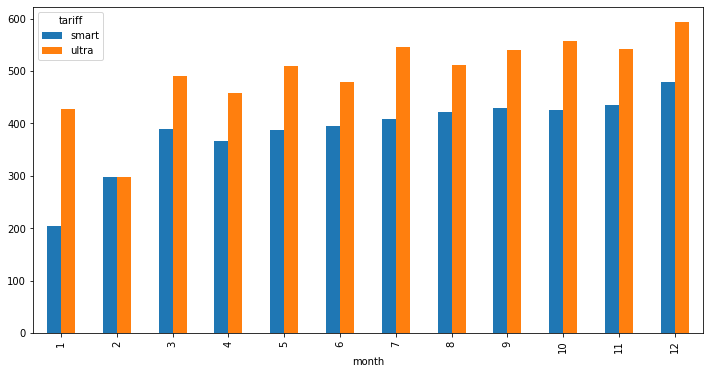

In [31]:
minut_mean = df.pivot_table(index='month', columns='tariff', values='call_min', aggfunc='mean')
display(minut_mean)
minut_mean.plot(kind='bar', figsize=(12,6))

Как видно из графика, абоненты тарифа ультра используют звонки больше чем абоненты тарифа смарт. Так же наблюдается схожая динамика роста и снижения в зависимости от месяцев.

tariff,smart,ultra
month,,
1,23787.341355,72769.361111
2,36412.287961,87919.679348
3,36823.155161,111384.900901
4,34778.207127,71653.870034
5,34820.061094,83870.193578
6,30742.918861,91535.946500
7,32250.269602,94322.278144
8,34793.583379,97956.496385
9,33535.342723,105716.775286


<AxesSubplot:xlabel='month'>

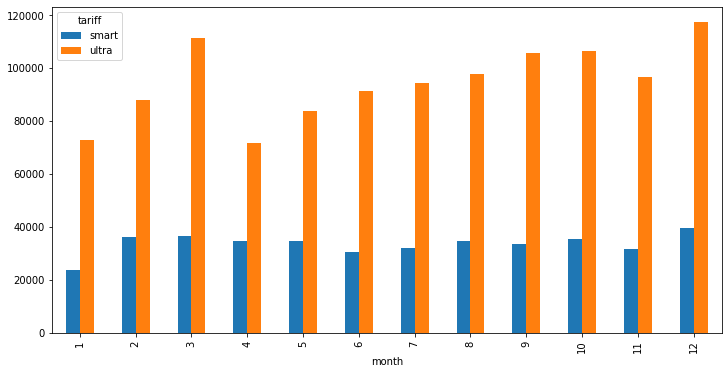

In [32]:
minut_var = df.pivot_table(index='month', columns='tariff', values='call_min', aggfunc='var')
display(minut_var)
minut_var.plot(kind='bar', figsize=(12,6))

Показатели дисперсии имеют схожую динамику исходя из тарифов, но на тарифе ультра, значения дисперсии намного выше.

<AxesSubplot:xlabel='month'>

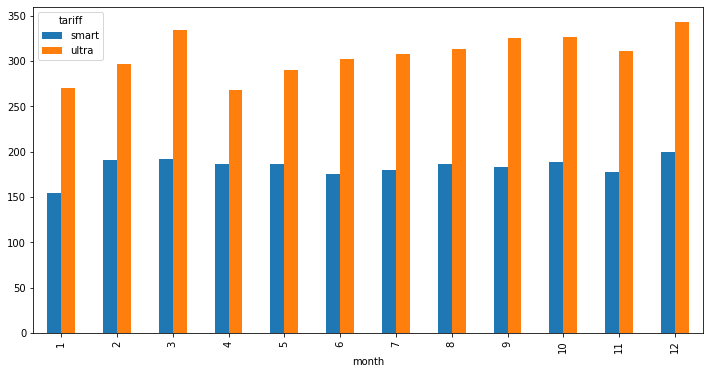

In [33]:
minut_std = df.pivot_table(index='month', columns='tariff', values='call_min', aggfunc='std')
minut_std.plot(kind='bar', figsize=(12,6))

Стандартное отклонение по тарифам, намного ближе друг к другу в сравнении с остальными параметрами.

tariff,smart,ultra
month,,
1,18.235294,33.777778
2,24.086207,21.958333
3,31.857143,32.297297
4,30.741071,31.563636
5,33.773050,37.850746
6,33.402439,41.726190
7,33.751244,49.846154
8,33.638298,48.439252
9,33.638462,52.286957


<AxesSubplot:xlabel='month'>

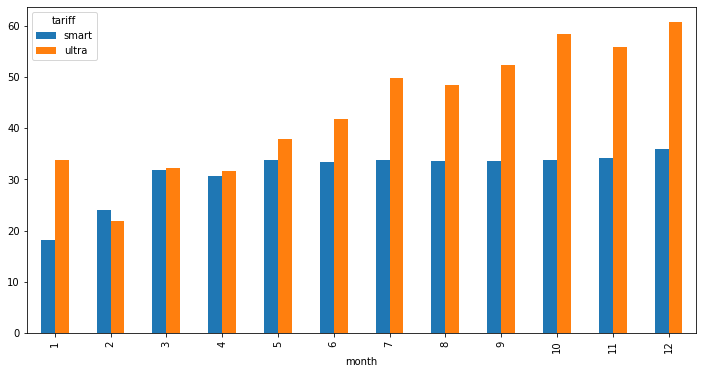

In [34]:
message_mean = df.pivot_table(index='month', columns='tariff', values='message_count', aggfunc='mean')
display(message_mean)
message_mean.plot(kind='bar', figsize=(12,6))

tariff,smart,ultra
month,,
1,262.367201,940.694444
2,473.097701,716.824275
3,718.492481,1732.381381
4,602.139559,1407.287542
5,730.990983,1624.644052
6,806.806374,1986.297619
7,799.887811,2372.042735
8,838.257501,2171.739199
9,790.617820,2152.855530


<AxesSubplot:xlabel='month'>

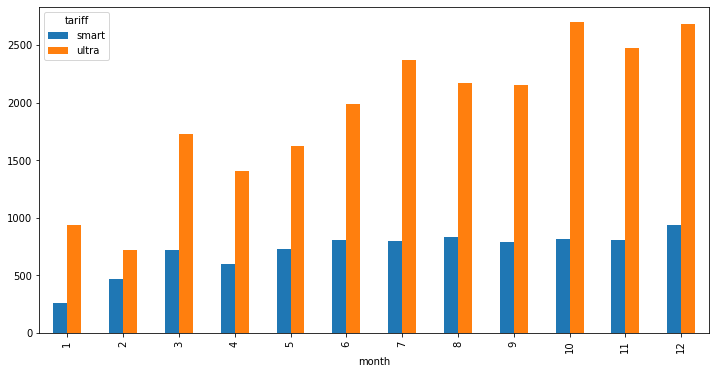

In [35]:
message_var = df.pivot_table(index='month', columns='tariff', values='message_count', aggfunc='var')
display(message_var)
message_var.plot(kind='bar', figsize=(12,6))

tariff,smart,ultra
month,,
1,16.197753,30.670742
2,21.750809,26.773574
3,26.804710,41.621886
4,24.538532,37.513831
5,27.036845,40.306874
6,28.404337,44.567899
7,28.282288,48.703621
8,28.952677,46.601923
9,28.117927,46.398874


<AxesSubplot:xlabel='month'>

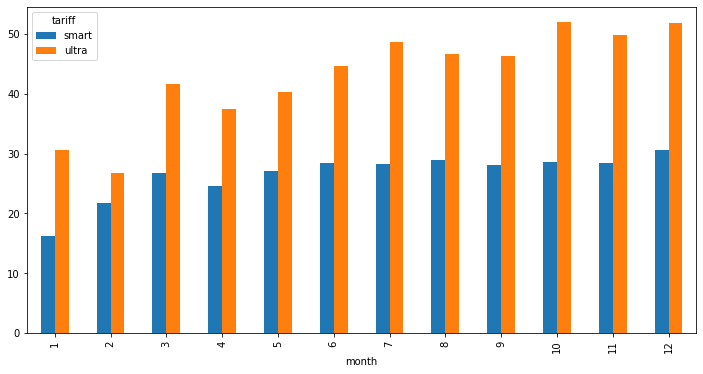

In [36]:
message_std = df.pivot_table(index='month', columns='tariff', values='message_count', aggfunc='std')
display(message_std)
message_std.plot(kind='bar', figsize=(12,6))

По сообщениям, динамика среднего, дисперсии и стандартного отклонения одинаковы, с небольшими различиями в значениях.

tariff,smart,ultra
month,,
1,8.735294,13.222222
2,11.844828,12.000000
3,15.233766,17.648649
4,13.625000,16.963636
5,15.907801,19.373134
6,15.951220,18.940476
7,15.875622,20.505495
8,16.736170,19.598131
9,16.392308,19.243478


<AxesSubplot:xlabel='month'>

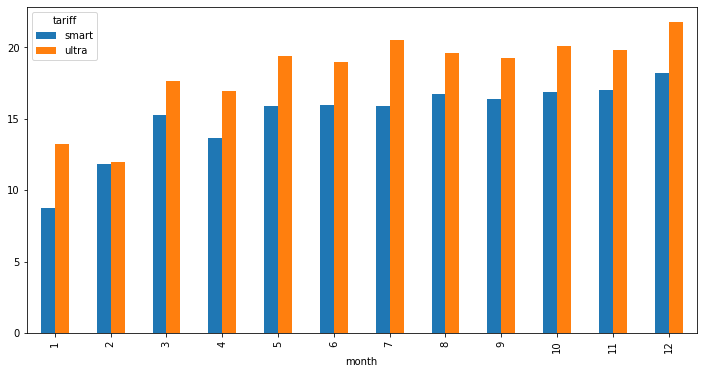

In [37]:
internet_mean = df.pivot_table(index='month', columns='tariff', values='gb_used', aggfunc='mean')
display(internet_mean)
internet_mean.plot(kind='bar', figsize=(12,6))

tariff,smart,ultra
month,,
1,39.412656,44.444444
2,37.150938,109.130435
3,32.549897,114.345345
4,31.299550,89.443098
5,34.370010,95.631389
6,31.911716,82.394005
7,33.419453,96.430525
8,30.041207,105.148298
9,25.884110,86.255988


<AxesSubplot:xlabel='month'>

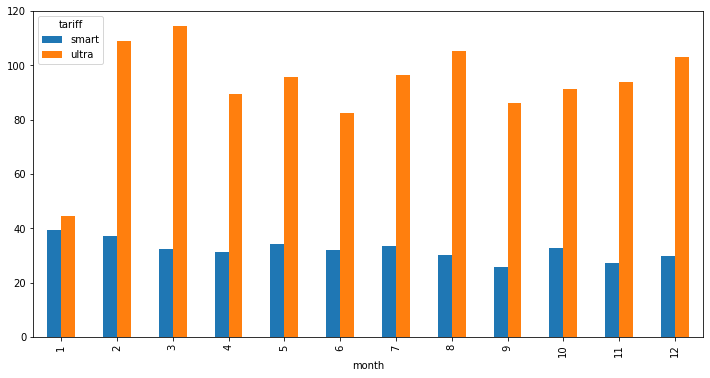

In [38]:
internet_var = df.pivot_table(index='month', columns='tariff', values='gb_used', aggfunc='var')
display(internet_var)
internet_var.plot(kind='bar', figsize=(12,6))

tariff,smart,ultra
month,,
1,6.277950,6.666667
2,6.095157,10.446551
3,5.705252,10.693238
4,5.594600,9.457436
5,5.862594,9.779130
6,5.649046,9.077114
7,5.780956,9.819905
8,5.480986,10.254184
9,5.087643,9.287410


<AxesSubplot:xlabel='month'>

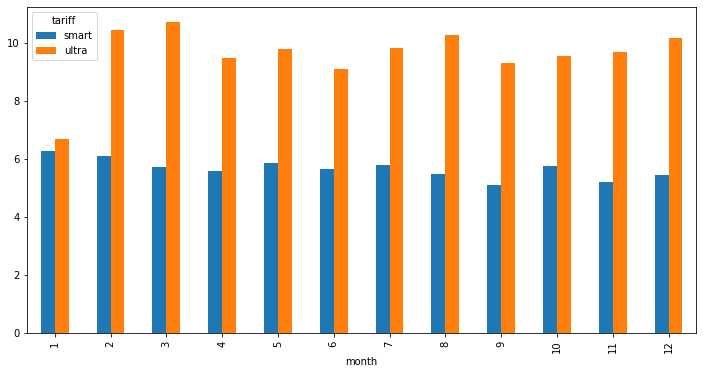

In [39]:
internet_std = df.pivot_table(index='month', columns='tariff', values='gb_used', aggfunc='std')
display(internet_std)
internet_std.plot(kind='bar', figsize=(12,6))

По данным трафика, результаты схожие с прошлыми

Построим общие гистрограмы и определим их тип:

<AxesSubplot:>

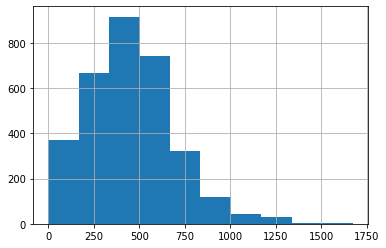

In [40]:
df['call_min'].hist()

Гистограмма скошенна вправо, значит является положительной а среднее больше чем медианна 

<AxesSubplot:>

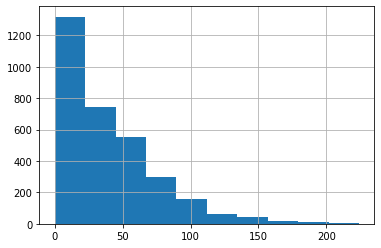

In [41]:
df['message_count'].hist()


Гистограмма скошенна вправо, значит является положительной а среднее больше чем медианна 

<AxesSubplot:>

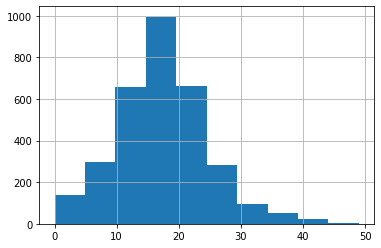

In [42]:
df['gb_used'].hist()

Гистограмма скошенна вправо, значит является положительной а среднее больше чем медианна 

### Вывод
1. Наиболее часто абоненты используют интеренет и текстовые сообщения, чем звонки, об этом можно судить по данным полученным при расчетах и построенных графиков, но на звонки тратиться больше времени.
2. Динамика роста, наиболее выражена в начале и конце года.
3. Эти данные можно использовать к примеру для промоакций на эти периоды, что позволит привлечь еще больше пользователей именно к этому оператору, таким образом возомжно увеличение выручки.
4. Определили скошенность данных, все гистрограмы имеют скошенность вправо. в гистрограмме по сообщениям также замечем пик рядом с 0, это могло быть вызвано, тем что пропущенные значения после совмещения таблица мы заполнили "0"

## Проверка гипотез

1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
2. Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Для проверки гипотез применим t-тест, котоый возвращет p-value, по которому определяем какую из гипотез отвергать. В случае если p-value больше alpha, принимаем нулевую гипотезу, в обратном - альтернативную

Н0: Средние выручки по тарифам равны
Н1: Средние выручки по тарифам различаются

In [43]:
smart = df[df['tariff'] == 'smart']['full_price']
ultra = df[df['tariff'] == 'ultra']['full_price']

In [44]:
alpha = .05

results = st.ttest_ind(smart, ultra,nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


tariff,smart,ultra
month,,
1,721.323529,1950.000000
2,827.603448,1975.000000
3,1164.623377,2014.864865
4,963.089286,2001.818182
5,1197.510638,2059.701493
6,1204.018293,2039.285714
7,1223.950249,2118.131868
8,1320.595745,2083.177570
9,1249.946154,2024.347826


<AxesSubplot:xlabel='month'>

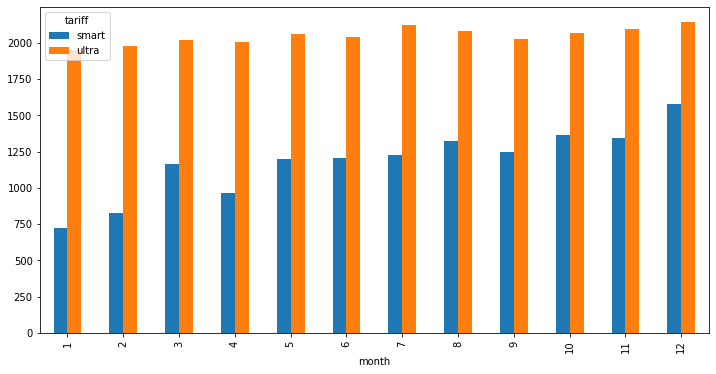

In [45]:
mean_price = df.pivot_table(index='month', columns='tariff', values='full_price', aggfunc='mean')
display(mean_price)
mean_price.plot(kind='bar', figsize=(12,6))

Проверили первую гипотезу с помощью t теста, так же построили график чтобы наглядно показать результаты t теста, на основании этих можно можно утверждать, что исходя из этой выборки выручки по тарифам действительно различаются и наиболее прибыльной оказывается тариф "Ультра". Таким образом отвергаем нулевую гипотезу о том что, выручки по тарифам равны, и принимаем гипотезу о том, что тариф ультра приносит больше денег.

Н0: Средняя выручка пользователей из Москвы равна средней выручки из других регионов
Н1: Средняя выручка пользователей их Москвы отличается

In [46]:
moscow = df[df['city'] == 'Москва']['full_price']
other = df[df['city'] != 'Москва']['full_price']

In [47]:
alpha = .05

results = st.ttest_ind(moscow, other,nan_policy='omit')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


In [48]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


<AxesSubplot:>

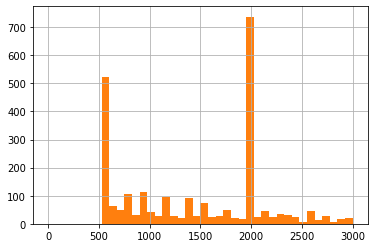

In [49]:
moscow.hist(bins=40, range=(0,3000))
other.hist(bins=40, range=(0,3000))

В этом случае проверили гипотезу о том, что выручки по городу Москва и остальным регионам равны. По результатам расчетов и построенном графике видно, что выручки дейтсвительно равны или незначительно различаются. Отвергаем альтернативную гипотезу и принимаем нулевую

## Общий вывод

1. В этом кейсе изучали тарифы для телеком компании
2. Подготовили данные для обработки состоящии из 5 разных таблиц данных: 
* Пользователи
* Звонки
* Сообщения
* Интернет-трафик
* Данные о тарифах
3. Добавили распределение по месяцам, перевели данные в формат в соотвествии с требованиями к оплате от оператора, соединили данные в одну таблицу.
4. Посчитали для каждого пользователя из выборки:
* среднее число звонков, сообщений, интернет трафика,
* дисперсию для звонков, сообщений, интернет трафика,
* стандартное отклонение для звонков, сообщений, интернет трафика,
* выручку исходя из оплаты за тариф и сверху тарифа за доп трафик, минуты звонков и сообщений
5. Распределили данные по месяцам для каждого пользователя.
6. Из построенных графиков видно, что абоненты разных тарифов используют их практически одинаково, со схожей динамикой роста в начале и конце года. 
7. Сотавили гипотезы исходя из интересующих нас данных о выручках, о том:
* Различаются ли выручки по тарифам
* Различаются ли выручки исходя из города Москва и других регионов.
8. Построили графики после проведения тестов и принятия нулевой гипотезы в первом случае о том, что выручка различается. И о том, что в среднем выручка по Москве и других регионах равна.
9. Поэтому наиболее перспективным тарифом можно считать тариф "Ультра", он более гибок, имеет большие пакеты, да он дороже, но так же имеет сниженные цены на дополнительные пакеты, а если исходить из динамики роста, то можно добавить сезонные промоакции, которые помогут привлечь новый абонентов именно к данной телекомпании, что позволит увеличить выручку.
10. По тарифу "Смарт", если учесть что показатели для него практически равны, значит им тоже пользуются активно, скорее всего абоненты иного сегмента, таким образом, "Ультру" можно развивать, и предлагать чаще, а "Смарт" использовать для более обычного пользования, исходя из динамики, понижение и рост активности на смарте, гораздно плавнее чем на "Ультра".
11. Для наглядной оценки прикладываю:
* График сравнения выручки по двум тарифам
* Таблица среднего использования трафика и сообщений по месяцам

tariff,smart,ultra
month,,
1,8.735294,13.222222
2,11.844828,12.000000
3,15.233766,17.648649
4,13.625000,16.963636
5,15.907801,19.373134
6,15.951220,18.940476
7,15.875622,20.505495
8,16.736170,19.598131
9,16.392308,19.243478


tariff,smart,ultra
month,,
1,18.235294,33.777778
2,24.086207,21.958333
3,31.857143,32.297297
4,30.741071,31.563636
5,33.773050,37.850746
6,33.402439,41.726190
7,33.751244,49.846154
8,33.638298,48.439252
9,33.638462,52.286957


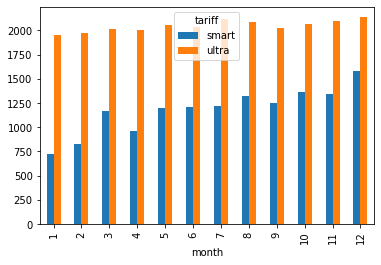

In [50]:
full_price = df.pivot_table(index='month', columns='tariff', values='full_price', aggfunc='sum')
mean_price.plot(kind='bar')
display(internet_mean)
display(message_mean)

## Бонус

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
revenue = df.copy()

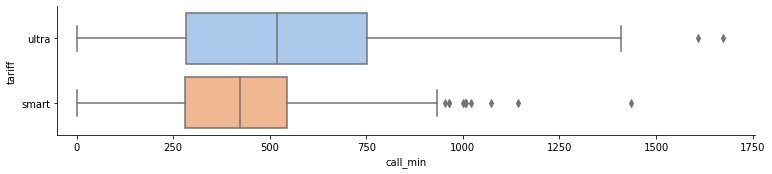

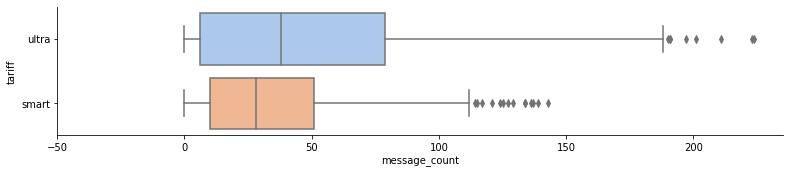

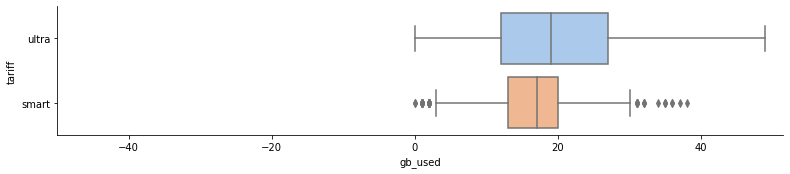

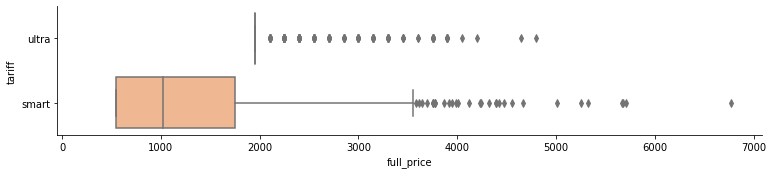

In [53]:
for column in ['call_min', 'message_count', 'gb_used', 'full_price']:    
    g = sns.catplot(y='tariff', x=column, kind="box", data= revenue, orient='h', palette = 'pastel')
    g.fig.set_figwidth(12)
    g.fig.set_figheight(2)
    g.set(xlim=(-50, None))

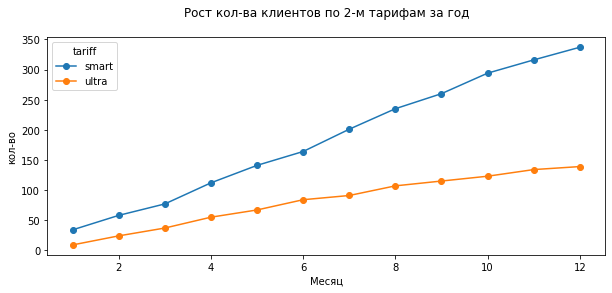

In [54]:
(revenue
 .pivot_table(index='tariff', columns='month', values='user_id', aggfunc='count')
 .T
 .plot

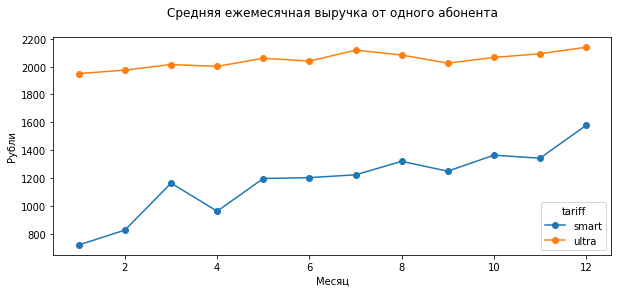

In [55]:
(revenue
 .pivot_table(index='tariff', columns='month', values='full_price', aggfunc='mean')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Средняя ежемесячная выручка от одного абонента'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

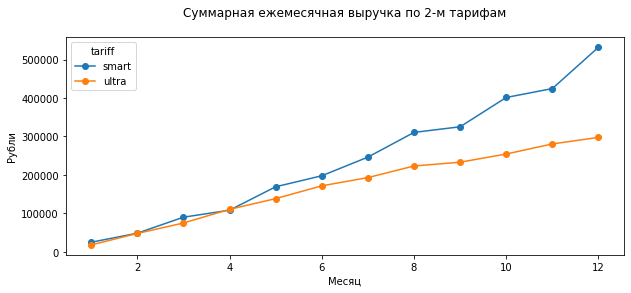

In [56]:
(revenue
 .pivot_table(index='tariff', columns='month', values='full_price', aggfunc='sum')
 .T
 .plot(kind='line', figsize=(10,4),  style = 'o-')
)
plt.title('Суммарная ежемесячная выручка по 2-м тарифам'+ "\n")
plt.xlabel('Месяц')
plt.ylabel('Рубли');

# выручка от смартов уже в два раза выше выручки от ультры, но есть опасность - убегут клиенты смарт от такой счастливой жизни к конкурентам :)

In [57]:
# на скорую руку
df_users = pd.read_csv('/datasets/users.csv')

print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count().to_frame()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


,churn_date
tariff,
smart,22
ultra,13


# отток усиливается?

# мы не ограничены в рекомендациях бизнесу только двумя тарифами, если мы видим риски для бизнеса мы можем предложить и третий и четвертый вариант развития тарифной политики